# Housing Price Prediction – Albany Real Estate


This project involves predicting housing prices using linear regression. Key steps include data cleaning, exploratory analysis, feature selection, and model training using `scikit-learn`.

In [ ]:
# Pre-load packages

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math

In [ ]:
# listings_raw = pd.read_csv('Albany.csv')

from google.colab import files
uploaded = files.upload()

import io
listings_raw = pd.read_csv(io.BytesIO(uploaded['Albany.csv']))

Saving Albany.csv to Albany.csv


In [ ]:
# Explore the first 5 rows

listings_raw.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,"In accordance with local MLS rules, some MLS l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MLS Listing,NaN,Single Family Residential,278 Mccarty Ave,Albany,NY,12209.0,155000.0,3.0,1.0,...,Active,NaN,NaN,https://www.redfin.com/NY/Albany/278-McCarty-A...,Global MLS,202424975.0,N,Y,42.635756,-73.778027
2,MLS Listing,NaN,Multi-Family (5+ Unit),372 Madison Ave,Albany,NY,12210.0,185000.0,8.0,5.0,...,Active,NaN,NaN,https://www.redfin.com/NY/Albany/372-Madison-A...,Global MLS,202424965.0,N,Y,42.651029,-73.765599
3,MLS Listing,NaN,Condo/Co-op,805 Greenwich Dr,Albany,NY,12203.0,187000.0,2.0,1.0,...,Active,NaN,NaN,https://www.redfin.com/NY/Albany/805-Greenwich...,Global MLS,202424952.0,N,Y,42.698361,-73.859993
4,MLS Listing,NaN,Single Family Residential,12 Monroe Ave,Albany,NY,12203.0,375000.0,3.0,1.5,...,Active,September-8-2024 01:00 PM,September-8-2024 03:00 PM,https://www.redfin.com/NY/Albany/12-Monroe-Ave...,Global MLS,202424945.0,N,Y,42.667950,-73.829496


In [ ]:
# Remove the 1st row (index 0) which is NaN
listings = listings_raw.drop(index=0)

In [ ]:
# Explore the first 5 rows

listings.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
1,MLS Listing,NaN,Single Family Residential,278 Mccarty Ave,Albany,NY,12209.0,155000.0,3.0,1.0,...,Active,NaN,NaN,https://www.redfin.com/NY/Albany/278-McCarty-A...,Global MLS,202424975.0,N,Y,42.635756,-73.778027
2,MLS Listing,NaN,Multi-Family (5+ Unit),372 Madison Ave,Albany,NY,12210.0,185000.0,8.0,5.0,...,Active,NaN,NaN,https://www.redfin.com/NY/Albany/372-Madison-A...,Global MLS,202424965.0,N,Y,42.651029,-73.765599
3,MLS Listing,NaN,Condo/Co-op,805 Greenwich Dr,Albany,NY,12203.0,187000.0,2.0,1.0,...,Active,NaN,NaN,https://www.redfin.com/NY/Albany/805-Greenwich...,Global MLS,202424952.0,N,Y,42.698361,-73.859993
4,MLS Listing,NaN,Single Family Residential,12 Monroe Ave,Albany,NY,12203.0,375000.0,3.0,1.5,...,Active,September-8-2024 01:00 PM,September-8-2024 03:00 PM,https://www.redfin.com/NY/Albany/12-Monroe-Ave...,Global MLS,202424945.0,N,Y,42.667950,-73.829496
5,MLS Listing,NaN,Multi-Family (2-4 Unit),107 Hollywood Ave,Albany,NY,12208.0,375000.0,4.0,2.0,...,Active,NaN,NaN,https://www.redfin.com/NY/Albany/107-Hollywood...,Global MLS,202424936.0,N,Y,42.650809,-73.796437


In [ ]:
# Get a list of all column names

listings.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [ ]:
# Drop unwanted columns

listings = listings[['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']]

In [ ]:
# Check non-null value distribution

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 1 to 258
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PROPERTY TYPE  258 non-null    object 
 1   PRICE          258 non-null    float64
 2   BEDS           240 non-null    float64
 3   BATHS          240 non-null    float64
 4   SQUARE FEET    208 non-null    float64
 5   LOT SIZE       254 non-null    float64
dtypes: float64(5), object(1)
memory usage: 12.2+ KB


4. Check for missing values using a heatmap.
5. Check data distribution by property type using a histogram (bar graph).
6. Exclude records if appropriate.

3 pts.



<Axes: >

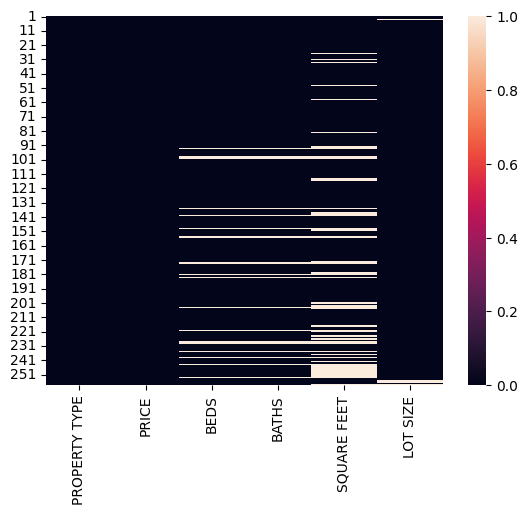

In [ ]:
# Explore missing values across features

sns.heatmap(listings.isnull(), cbar=True)

<Axes: >

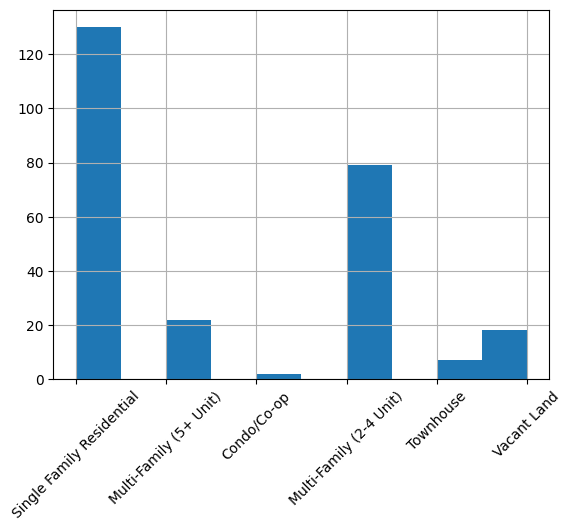

In [ ]:
# Explore frequency distribution of different property types

listings['PROPERTY TYPE'].hist(xrot=45.0)

In [ ]:
listings['PROPERTY TYPE'].unique()

array(['Single Family Residential', 'Multi-Family (5+ Unit)',
       'Condo/Co-op', 'Multi-Family (2-4 Unit)', 'Townhouse',
       'Vacant Land'], dtype=object)

In [ ]:
property_types_to_remove = ['Vacant Land']

listings.drop(listings[listings['PROPERTY TYPE'].isin(property_types_to_remove)].index, inplace=True)

7. Build a pairplot to evaluate data distributions and correlations.
8. Comment whether the predictors: 1) have a linear relationship with the target (Price), 2) display constant variance (homoscedasticity), 3) contain outliers that need to be excluded.

5 pts.

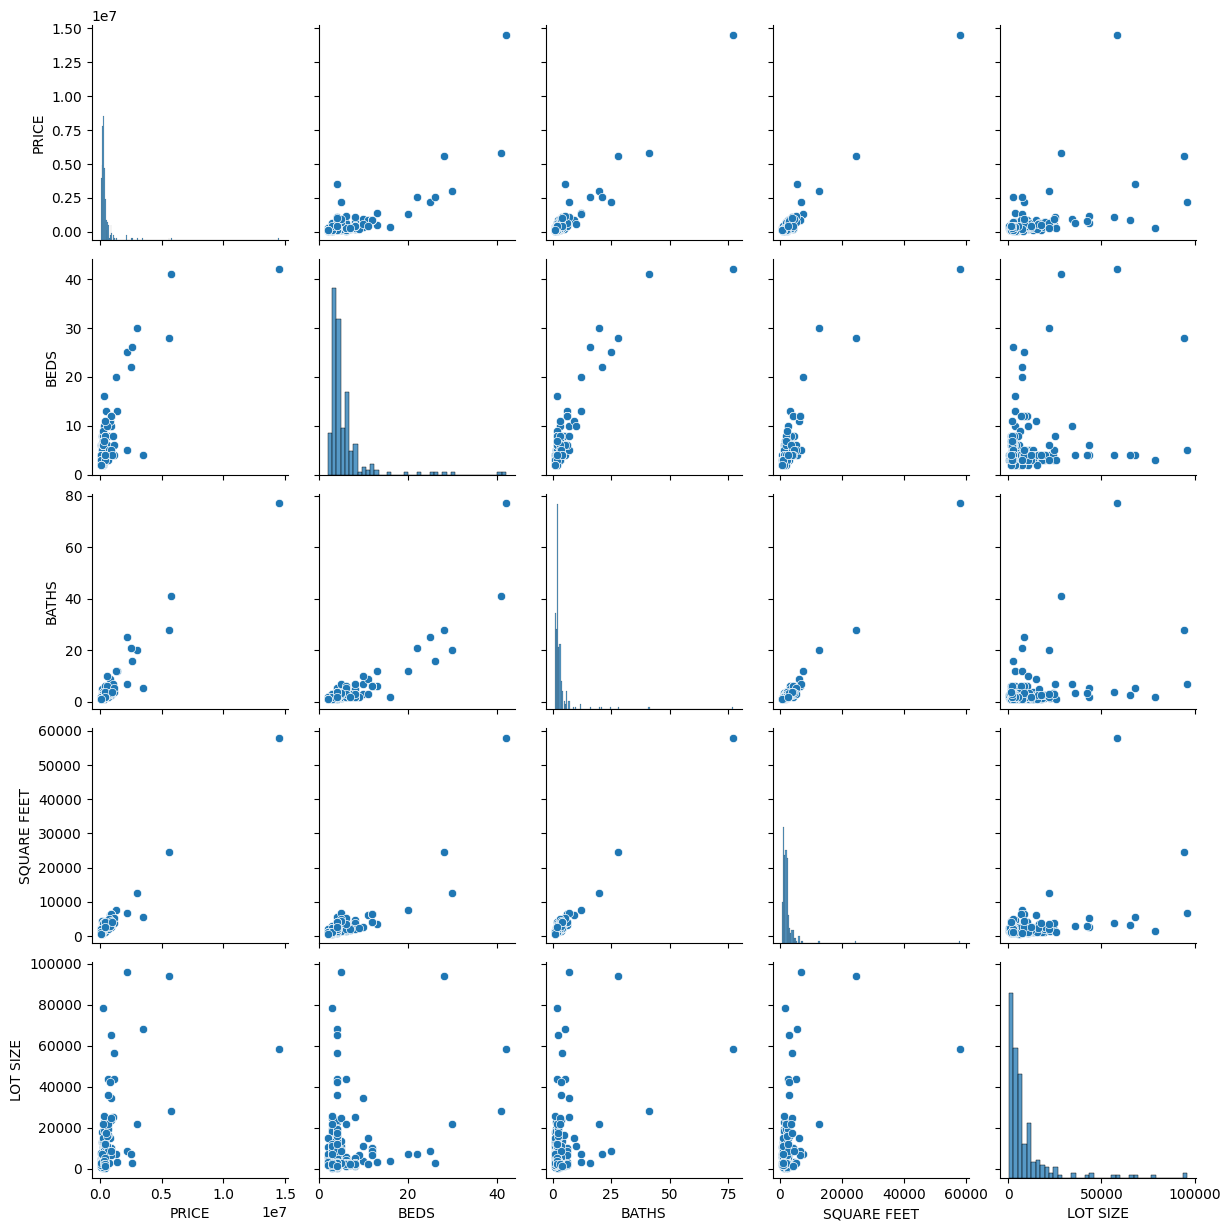

In [ ]:
sns.pairplot(listings)

In [ ]:
# Get summary statistics

listings.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
count,2.330000e+02,233.000000,233.000000,201.000000,229.000000
mean,4.175952e+05,5.253219,2.905579,2152.497512,7237.423581
std,5.097184e+05,4.418837,3.816041,1309.705078,7510.274847
min,8.490000e+04,2.000000,1.000000,700.000000,435.000000
25%,2.290000e+05,3.000000,1.500000,1364.000000,2613.000000
50%,3.095000e+05,4.000000,2.000000,1920.000000,4356.000000
75%,4.250000e+05,6.000000,3.000000,2444.000000,9147.000000
max,5.800000e+06,41.000000,41.000000,12696.000000,43560.000000


**Comments**
1. BEDS, BATHS & SQUARE FEET positive linear relationship with PRICE & LOT SIZE does not display a clear linear relationship with PRICE.
2. BEDS, BATHS, and SQUARE FEET appear to have a relatively consistent spread of points across different price levels, suggesting homoscedasticity &  for LOT SIZE, the variance is not constant which suggests some heteroscedasticity.
3. Contain outliers are Sqare feet > 20000 & Lot size > 50000



9. Remove outliers if necessary.
10. Impute missing values as appropriate.

2 pts.


In [ ]:
# Filter out records matching criteria

listings.drop(listings[listings['SQUARE FEET'] > 20000 ].index, inplace=True)
listings.drop(listings[listings['LOT SIZE'] > 50000 ].index, inplace=True)

In [ ]:
# Mean impute missing numeric values

imputed = listings.fillna(listings.mean(numeric_only=True))

In [ ]:
imputed.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
count,2.330000e+02,233.000000,233.000000,233.000000,233.000000
mean,4.175952e+05,5.253219,2.905579,2152.497512,7237.423581
std,5.097184e+05,4.418837,3.816041,1216.030637,7445.249598
min,8.490000e+04,2.000000,1.000000,700.000000,435.000000
25%,2.290000e+05,3.000000,1.500000,1424.000000,2613.000000
50%,3.095000e+05,4.000000,2.000000,2048.000000,4791.000000
75%,4.250000e+05,6.000000,3.000000,2372.000000,9147.000000
max,5.800000e+06,41.000000,41.000000,12696.000000,43560.000000


11. Split data 70/30 into training and test datasets.
12. Build a multiple linear regression model to predict Price.
13. Report R2, MAE, Max error, RMSE.
14. Comment on whether the model performance would be acceptable for practitioners.

7 pts.

In [ ]:
imputed.columns

Index(['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE'], dtype='object')

In [ ]:
predictors = ['PROPERTY TYPE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']

In [ ]:
# Split data 70/30 into training and test datasets.
X = pd.get_dummies(imputed[predictors], drop_first=True)
y = imputed['PRICE']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
re_prices = LinearRegression()

re_prices.fit(train_X, train_y)

LinearRegression()

In [ ]:
X.columns

Index(['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
       'PROPERTY TYPE_Multi-Family (2-4 Unit)',
       'PROPERTY TYPE_Multi-Family (5+ Unit)',
       'PROPERTY TYPE_Single Family Residential', 'PROPERTY TYPE_Townhouse'],
      dtype='object')

In [ ]:
# Regression functional form
# Price = Intercept + b1*BEDS + b2*BATHS + b3*SqFt + b4*LotSize + b5*MF24 + b6*MF5 + b7*SFR + b8*townhouse

re_prices.intercept_

-68813.07235609333

In [ ]:
re_prices.coef_

array([ 3.24692325e+04,  1.02450429e+05,  2.61029123e+01,  8.42703441e+00,
       -1.61994760e+05, -3.64209733e+05, -1.20983132e+04, -6.61624654e+01])

In [ ]:
train_X.head()

,BEDS,BATHS,SQUARE FEET,LOT SIZE,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Multi-Family (5+ Unit),PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse
61,6.0,2.0,4160.000000,2613.0,True,False,False,False
80,5.0,1.5,1392.000000,6098.0,False,False,True,False
231,3.0,1.0,1024.000000,7405.0,False,False,True,False
245,8.0,2.0,2152.497512,5227.0,True,False,False,False
168,3.0,1.0,1185.000000,5662.0,False,False,True,False


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score

In [ ]:
pred_y = re_prices.predict(valid_X)

In [ ]:
print('Regression model performance evaluation')
print('R2: ', r2_score(valid_y, pred_y))
print('MAE: ', mean_absolute_error(valid_y, pred_y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_y, pred_y)))
print('Max error: ', max_error(valid_y, pred_y))

Regression model performance evaluation
R2:  0.5962781140982951
MAE:  106790.69148808559
RMSE:  140320.6041643369
Max error:  464130.66671086475


- The model has an R² of 0.596, indicating a Average fit, as it explains 59..6% of the variance. However, the MAE (106790) and RMSE (140320) suggest significant average errors, which could be depending on the context. The max error of 466130 indicates that some predictions are quite far off. Overall, the model’s performance isn’t accurate enough for practical use and could be improved

